# 0.0 - Imports Libraries

In [1]:
import time
import warnings

import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt

from IPython import display

from sklearn import metrics as mt
from sklearn.cluster import AffinityPropagation
from sklearn.decomposition import PCA

In [2]:
warnings.filterwarnings('ignore')

# 1.0 - Load Data

In [3]:
# Dataset 
df_X = pd.read_csv( '../dataset/clusterizacao/X_dataset.csv')

In [4]:
df_X.shape

(178, 13)

In [5]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               178 non-null    float64
 1   malic_acid            178 non-null    float64
 2   ash                   178 non-null    float64
 3   ash_alcanity          178 non-null    float64
 4   magnesium             178 non-null    float64
 5   total_phenols         178 non-null    float64
 6   flavanoids            178 non-null    float64
 7   nonflavanoid_phenols  178 non-null    float64
 8   proanthocyanins       178 non-null    float64
 9   color_intensity       178 non-null    float64
 10  hue                   178 non-null    float64
 11  od280                 178 non-null    float64
 12  proline               178 non-null    float64
dtypes: float64(13)
memory usage: 18.2 KB


In [6]:
df_X.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,-0.000,1.003,-2.434,-0.788,0.061,0.836,2.260
malic_acid,178.0,0.315,0.221,0.000,0.170,0.222,0.463,1.000
ash,178.0,-0.000,1.003,-3.679,-0.572,-0.024,0.698,3.156
ash_alcanity,178.0,-0.000,1.003,-2.671,-0.689,0.002,0.602,3.155
magnesium,178.0,-0.000,1.003,-2.088,-0.824,-0.122,0.510,4.371
total_phenols,178.0,0.453,0.216,0.000,0.263,0.474,0.628,1.000
flavanoids,178.0,0.356,0.211,0.000,0.182,0.379,0.535,1.000
nonflavanoid_phenols,178.0,0.000,1.003,-1.868,-0.740,-0.176,0.610,2.402
proanthocyanins,178.0,-0.000,1.003,-2.069,-0.597,-0.063,0.629,3.485
color_intensity,178.0,0.000,1.003,-1.634,-0.795,-0.159,0.494,3.435


# 2.0 - Affinity Propagation

### Parametro
* Preference

## 2.1 - Hyperparameter Fine Tuning

In [7]:
# Testing parameters
p = np.arange( -100, -151, -1 )

ss_list = []
k_list  = []

best_p = 0
best_k = 0
best_ss = 0

for i in range( len(p) ):
    # Definition
    affinity_prop = AffinityPropagation( preference=p[i] )

    # Trainiing
    affinity_prop.fit(df_X)

    # Predict
    labels = affinity_prop.labels_

    # Performance
    ss = mt.silhouette_score( df_X, labels )
    ss_list.append( ss )
    k_list.append( len( affinity_prop.cluster_centers_indices_ ))

    # Print best K and best preference
    display.clear_output( wait=True )
    time.sleep( 0.2 )

    best_p = p[ np.argmax( ss_list) ]
    best_k = k_list[ np.argmax( ss_list ) ]
    best_ss = np.round( max(ss_list), 3 )

    print(f'Preference: {p[i]} ')
    print(f'Best Preference Value: {best_p} ')
    print(f'Best Number of Clusters: {best_k} ' )
    print(f'Best Silhouette Score: {best_ss} ')

Preference: -150 
Best Preference Value: -142 
Best Number of Clusters: 3 
Best Silhouette Score: 0.215 


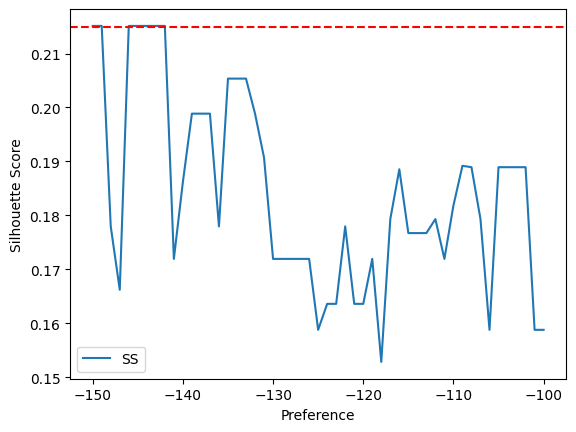

In [8]:
plt.plot( p, ss_list, label='SS')
plt.axhline( y=best_ss, color='r', linestyle='--' )
plt.xlabel( 'Preference' )
plt.ylabel( 'Silhouette Score' )
plt.legend();

## 2.2 - PCA

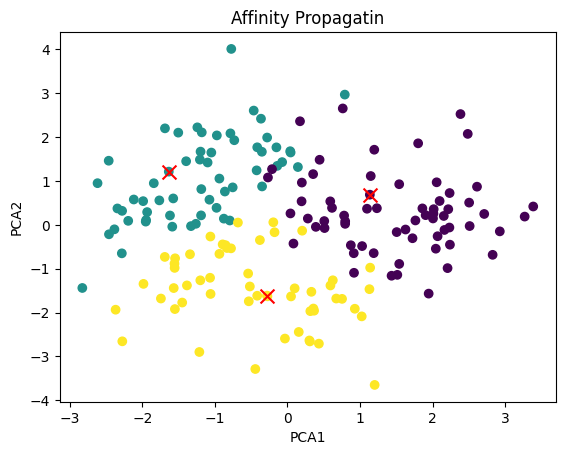

In [12]:
# Reduce X
pca = PCA( n_components=2 )
reduced_X = pca.fit_transform( df_X )
reduced_X = pd.DataFrame( data=reduced_X, columns=['PC1', 'PC2'] )
reduced_X.head()

# reduced centers
centers = pca.transform( affinity_prop.cluster_centers_ )
centers

# Scatter Plot
plt.scatter( reduced_X['PC1'], reduced_X['PC2'], c=affinity_prop.labels_ )
plt.scatter( centers[:,0], centers[:,1], marker='x', s=100, c='red' )
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Affinity Propagatin');

In [14]:
print(best_k)
print(best_ss)

3
0.215
